# SHAP Tutorial 
<br>
Dataset: https://www.kaggle.com/uciml/mushroom-classification

In [2]:
#imports
import pandas as pd
import xgboost as xgb

import shap

from xverse.transformer import WOE
from sklearn.metrics import accuracy_score,confusion_matrix

## Dataset

In [ ]:
["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"

In [68]:
data = pd.read_csv("../data/abalone.data",
                  header=)
print(len(data))
data.head()

4176


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## Data Transformation

In [60]:
y = data['class']
X = data.drop('class', axis=1)
feature_names = X.columns
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,m


In [11]:
y = y.astype('category').cat.codes

for feature in X.columns: 
    X[feature] = X[feature].astype('category')
    X[feature] = X[feature].cat.codes
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,3,3


In [61]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='if_binary')
enc.fit(X)

X_encoded = enc.transform(X).toarray()

X = pd.DataFrame(X_encoded, columns= enc.get_feature_names(feature_names))


In [62]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
enc.get_feature_names(feature_names)

array(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y',
       'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c',
       'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b',
       'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e',
       'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k

In [12]:
clf = WOE()

clf.fit(X, y)

divide by zero encountered in log
divide by zero encountered in log


WOE(mono_custom_binning={'bruises': array([0, 1]),
                         'cap-color': array([0., 3., 4., 9.]),
                         'cap-shape': array([0., 2., 5.]),
                         'cap-surface': array([0, 1, 2, 3]),
                         'gill-attachment': array([0, 1]),
                         'gill-color': array([ 0.,  3.,  7., 11.]),
                         'gill-size': array([0, 1]),
                         'gill-spacing': array([0, 1]),
                         'habitat': array([0., 2., 6.]),
                         'odor': array([0., 2., 5., 8.]),
                         'population': array([0., 4., 5.]),
                         'r...
              'stalk-shape': {0: 0.23381667684063595, 1: -0.1793976775137614},
              'stalk-surface-above-ring': {0: -0.9695371240610162,
                                           1: 2.8109630522383187,
                                           2: -0.7908852961560242,
                                           3:

In [51]:
X= clf.transform(X)
X

ValueError: Empty list for WOE transformation.                             Estimator has to be fitted to make WOE transformations

In [ ]:
## Train Model

In [64]:
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X, y)

y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

[[4208    0]
 [   0 3916]]


1.0

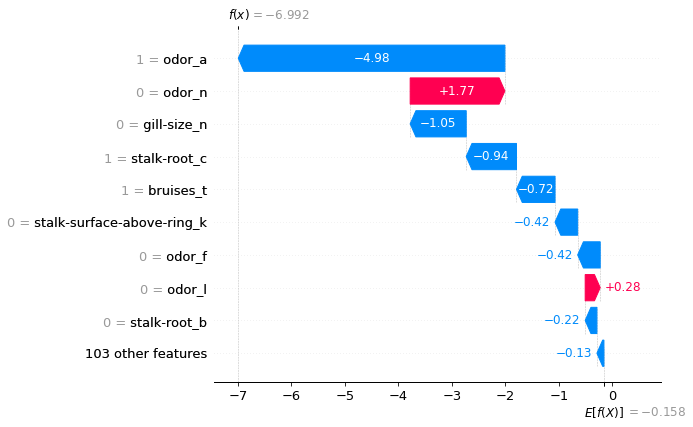

In [66]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

In [54]:
shap.plots.force(shap_values[0])
#shap.initjs()

In [55]:
shap.plots.force(shap_values[0:100])

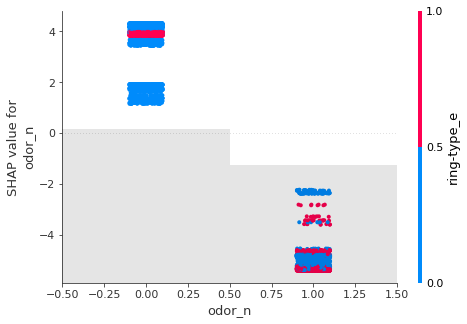

In [56]:
shap.plots.scatter(shap_values[:,"odor_n"], color=shap_values)

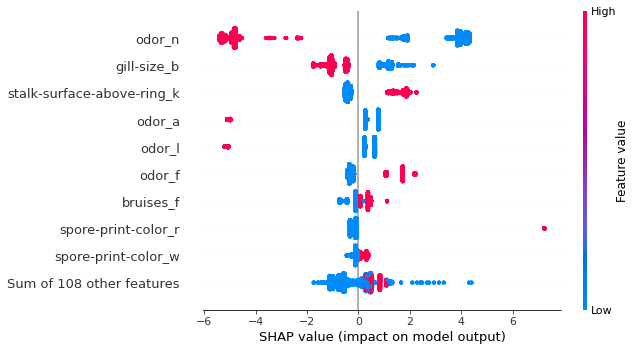

In [57]:
shap.plots.beeswarm(shap_values)

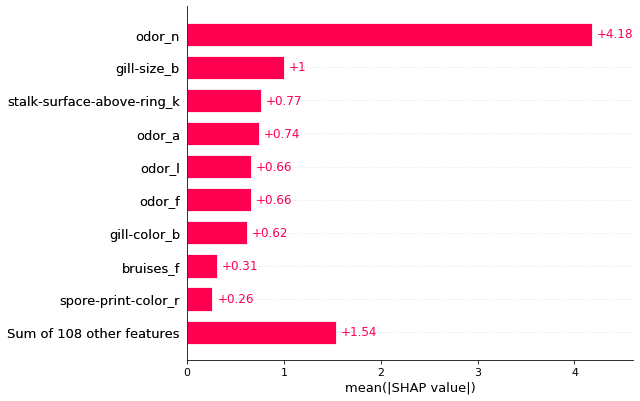

In [58]:
shap.plots.bar(shap_values)